In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
import seaborn as sns

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import shutil
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

This code snippet sets up the environment for a Python notebook in a Kaggle kernel. Here's a breakdown of what each part does:

1. **Importing Libraries**: The code imports various libraries such as NumPy, pandas, matplotlib, seaborn, and scikit-learn. These libraries are commonly used for data manipulation, visualization, and machine learning tasks.

2. **Magic Command**: `%matplotlib inline` is a magic command that tells the notebook to display matplotlib plots inline, within the notebook itself.

3. **Data Processing Libraries**: Libraries like NumPy and pandas are used for data processing tasks, such as reading CSV files (`pd.read_csv`) and manipulating data.

4. **Visualization**: Matplotlib and seaborn are used for data visualization. Matplotlib is a plotting library, and seaborn is built on top of matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.

5. **Machine Learning Metrics**: The code imports functions from scikit-learn (`sklearn`) for machine learning metrics, such as accuracy_score and confusion_matrix, which are used to evaluate the performance of machine learning models.

6. **File Handling**: The code includes commented-out code for handling files in the Kaggle input directory. This part is typically used to list and access files in the input directory.

7. **Output Directory**: The code mentions that any results written to the current directory will be saved as output. This is useful for saving generated plots or other outputs.

Overall, this code snippet sets up the environment for data analysis and machine learning tasks in a Kaggle notebook, including importing necessary libraries, setting up plotting, and defining paths for input and output files.

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import os
from PIL import Image
import shutil

# Set the path to the SenMangoFruitDDS dataset
training_folder_name = '/content/drive/MyDrive/MangoFruitDDS/SenMangoFruitDDS_original'
# Define the classes based on the diseases and "Healthy" category
classes = ['Alternaria', 'Anthracnose', 'Black_Mould_Rot', 'Stem_and_Rot', 'Healthy']

# Set image size for the CNN model
img_size = (128, 128)

# Create a folder for resized images
train_folder = '/content/drive/MyDrive/MangoFruitDDS/Mango'

This code snippet is setting up the environment for working with image classification using PyTorch in a Kaggle kernel. Here's a breakdown of what each part does:

1. **Importing Libraries**: The code imports necessary libraries for working with PyTorch, including torchvision for dataset handling and model architecture, and torch.nn for defining neural network modules.

2. **Data Preprocessing**: The code imports torchvision.transforms for image transformations. This allows you to define transformations such as resizing images to a specified size (`transforms.Resize(img_size)`). These transformations are commonly used to preprocess images before feeding them into a neural network.

3. **Neural Network Architecture**: The code defines a neural network architecture using PyTorch's nn.Module class. This is where you would define the layers and operations of your neural network.

4. **Loss Function and Optimizer**: The code imports torch.optim for defining an optimizer (e.g., Adam) and torch.nn.functional for defining a loss function (e.g., cross-entropy loss).

5. **Metrics**: The code imports confusion_matrix from scikit-learn to compute the confusion matrix, which is a useful metric for evaluating the performance of a classification model.

6. **Data Path and Classes**: The code sets the path to the dataset and defines the classes based on the diseases and a "Healthy" category. This is important for loading the dataset and mapping labels to class names.

7. **Image Size**: The code sets the image size for the CNN model. This is the size to which all images will be resized before being fed into the neural network.

8. **Output Folder**: The code creates a folder for resized images. This is where the preprocessed images will be stored.

Overall, this code snippet sets up the environment for working with image classification using PyTorch in a Kaggle kernel, including importing libraries, defining neural network architecture, and setting up data

In [4]:
# Function to resize image
def resize_image(src_image, size=(128, 128), bg_color="white"):
    src_image.thumbnail(size, Image.LANCZOS)
    new_image = Image.new("RGB", size, bg_color)
    new_image.paste(src_image, (int((size[0] - src_image.size[0]) / 2), int((size[1] - src_image.size[1]) / 2)))
    return new_image

# Create resized copies of all the images
size = (128, 128)

if os.path.exists(train_folder):
    shutil.rmtree(train_folder)

for root, folders, files in os.walk(training_folder_name):
    for sub_folder in folders:
        save_folder = os.path.join(train_folder, sub_folder)
        if not os.path.exists(save_folder):
            os.makedirs(save_folder)
        file_names = os.listdir(os.path.join(root, sub_folder))
        for file_name in file_names:
            file_path = os.path.join(root, sub_folder, file_name)
            image = Image.open(file_path)
            resized_image = resize_image(image, size)
            save_as = os.path.join(save_folder, file_name)
            resized_image.save(save_as)

This code defines a function `resize_image` to resize images and then uses it to create resized copies of all the images in the specified `training_folder_name`. Here's what each part does:

1. **`resize_image` Function**: This function takes an image (`src_image`), a target size (`size`), and a background color (`bg_color`) as input and returns a resized image. It uses the `thumbnail` method to resize the image while preserving its aspect ratio and then creates a new image with the specified background color and pastes the resized image onto it.

2. **Resizing Images**: The code iterates over all the subfolders in the `training_folder_name` directory. For each subfolder, it creates a corresponding subfolder in the `train_folder` directory (where the resized images will be saved). It then iterates over all the files in the subfolder, opens each image, resizes it using the `resize_image` function, and saves the resized image in the corresponding subfolder in the `train_folder` directory.

3. **Cleanup**: Before creating resized images, the code checks if the `train_folder` directory already exists and deletes it if it does. This ensures that the `train_folder` directory is clean before saving the resized images.

Overall, this code snippet demonstrates how to resize images and create resized copies of all the images in a directory using Python's PIL library.

In [5]:
# Data augmentation and preprocessing
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the dataset
full_dataset = torchvision.datasets.ImageFolder(
    root=train_folder,
    transform=data_transform
)

# Split into training and testing datasets
train_size = int(0.7 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

This code snippet performs data augmentation and preprocessing, then loads the dataset, splits it into training and testing datasets, and creates data loaders for batch processing. Here's what each part does:

1. **Data Augmentation and Preprocessing**: `transforms.Compose` is used to create a series of transformations to be applied to the input images. In this case, `RandomHorizontalFlip` and `RandomVerticalFlip` randomly flip the images horizontally and vertically, which helps the model generalize better. `ToTensor` converts the images to PyTorch tensors, and `Normalize` normalizes the pixel values to have a mean of 0.5 and a standard deviation of 0.5 for each channel.

2. **Load the Dataset**: `torchvision.datasets.ImageFolder` is used to load the dataset from the `train_folder` directory and apply the specified transformations (`transform=data_transform`).

3. **Split into Training and Testing Datasets**: `torch.utils.data.random_split` is used to split the full dataset into training and testing datasets. The `train_size` is set to 70% of the full dataset, and the `test_size` is set to the remaining 30%.

4. **Create Data Loaders**: `torch.utils.data.DataLoader` is used to create data loaders for batch processing. The `train_loader` is created for the training dataset with a batch size of 32, shuffling the data, and using 4 worker processes for loading the data. The `test_loader` is created similarly for the testing dataset.

Overall, this code snippet prepares the dataset for training by applying data augmentation, preprocessing, splitting it into training and testing datasets, and creating data loaders for efficient batch processing.

In [7]:
# Define the CNN model
class Net(nn.Module):
    def __init__(self, num_classes=5):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.drop = nn.Dropout2d(p=0.2)
        self.fc = nn.Linear(in_features=32 * 32 * 24, out_features=num_classes)

    def forward(self, x):
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))
        x = F.dropout(self.drop(x), training=self.training)
        x = x.view(-1, 32 * 32 * 24)
        x = self.fc(x)
        return torch.log_softmax(x, dim=1)

# Instantiate the model
model = Net(num_classes=len(classes))

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set up the optimizer and loss criterion
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_criteria = nn.CrossEntropyLoss()

This code defines a convolutional neural network (CNN) model using PyTorch's `nn.Module` class for image classification. Here's a breakdown of the model and related setup:

1. **Model Architecture (`Net` Class)**:
   - The model consists of two convolutional layers (`conv1` and `conv2`) with ReLU activation functions and max pooling layers (`pool`).
   - `Dropout` is applied after the pooling layers to prevent overfitting.
   - The output of the convolutional layers is flattened and passed through a fully connected layer (`fc`) to produce the final output.
   - The `forward` method defines the forward pass of the network.

2. **Model Instantiation**:
   - An instance of the `Net` class is created with the number of classes set to the length of the `classes` list (5 in this case).

3. **Device Selection**:
   - The device (CPU or GPU) is selected based on availability, and the model is moved to that device.

4. **Optimizer and Loss Criterion**:
   - The Adam optimizer is used with a learning rate of 0.001 to optimize the model's parameters.
   - Cross-entropy loss is used as the loss criterion for training the model.

Overall, this code snippet defines a CNN model for mango fruit disease detection, sets up the model on the selected device, and specifies the optimizer and loss criterion for training.

In [ ]:
# Training function
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_criteria(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_loss = train_loss / len(train_loader)
    print('Epoch {}: Train set: Average loss: {:.6f}'.format(epoch, avg_loss))
    return avg_loss

This code defines a training function for the CNN model. Here's a breakdown of how the function works:

1. **Input Parameters**:
   - `model`: The CNN model to be trained.
   - `device`: The device (CPU or GPU) on which the model is located.
   - `train_loader`: The data loader for the training dataset.
   - `optimizer`: The optimizer used to update the model's parameters.
   - `epoch`: The current epoch number.

2. **Training Loop**:
   - The function sets the model to training mode (`model.train()`).
   - It iterates over batches of data from the `train_loader`.
   - For each batch, it moves the data and target to the specified device (`data.to(device), target.to(device)`).
   - It zeros out the gradients (`optimizer.zero_grad()`).
   - It computes the output of the model and calculates the loss between the output and the target (`loss_criteria(output, target)`).
   - It accumulates the training loss (`train_loss += loss.item()`).
   - It performs backpropagation to compute the gradients (`loss.backward()`) and updates the model's parameters (`optimizer.step()`).

3. **Logging**:
   - After processing all batches, the function calculates the average training loss (`avg_loss = train_loss / len(train_loader)`).
   - It prints the average loss for the epoch.

4. **Return Value**:
   - The function returns the average loss for the epoch.

Overall, this function performs the training loop for one epoch of the dataset and updates the model's parameters based on the computed gradients.

In [9]:
# Testing function
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_criteria(output, target).item()
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target == predicted).item()
    avg_loss = test_loss / len(test_loader)
    accuracy = correct / len(test_loader.dataset)
    print('Test set: Average loss: {:.6f}, Accuracy: {:.2f}%'.format(avg_loss, accuracy * 100))

These two functions are used for training and testing the CNN model. Here's what each function does:

1. **`train` Function**:
   - Sets the model to training mode (`model.train()`).
   - Iterates over batches of the training dataset (`train_loader`).
   - Moves the data and target tensors to the specified device (`device`).
   - Zeroes the gradients (`optimizer.zero_grad()`).
   - Computes the output of the model for the input data (`output = model(data)`).
   - Computes the loss between the model's output and the target labels (`loss = loss_criteria(output, target)`).
   - Backpropagates the loss (`loss.backward()`) and updates the model's parameters (`optimizer.step()`).
   - Calculates the average training loss for the epoch and prints it.

2. **`test` Function**:
   - Sets the model to evaluation mode (`model.eval()`).
   - Iterates over batches of the test dataset (`test_loader`).
   - Moves the data and target tensors to the specified device (`device`).
   - Computes the output of the model for the input data (`output = model(data)`).
   - Computes the loss between the model's output and the target labels (`test_loss += loss_criteria(output, target).item()`).
   - Computes the number of correct predictions for accuracy calculation.
   - Calculates the average test loss and accuracy for the test set and prints them.

These functions are essential for training and evaluating the CNN model for mango fruit disease detection. The `train` function updates the model's parameters based on the training dataset, while the `test` function evaluates the model's performance on the test dataset.

In [ ]:
# Training loop
epochs = 50
epoch_nums = []
training_loss = []
validation_loss = []

for epoch in range(1, epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, epoch)
    test_loss = test(model, device, test_loader)
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch 1: Train set: Average loss: 1.369563
Test set: Average loss: 1.144324, Accuracy: 55.21%
Epoch 2: Train set: Average loss: 1.011759
Test set: Average loss: 1.034636, Accuracy: 58.30%
Epoch 3: Train set: Average loss: 0.897619
Test set: Average loss: 0.846085, Accuracy: 64.09%
Epoch 4: Train set: Average loss: 0.788627
Test set: Average loss: 0.841476, Accuracy: 69.88%
Epoch 5: Train set: Average loss: 0.707407
Test set: Average loss: 0.745114, Accuracy: 72.97%
Epoch 6: Train set: Average loss: 0.650665
Test set: Average loss: 0.740698, Accuracy: 72.97%
Epoch 7: Train set: Average loss: 0.604839
Test set: Average loss: 0.739774, Accuracy: 72.97%
Epoch 8: Train set: Average loss: 0.583150
Test set: Average loss: 0.680938, Accuracy: 71.04%
Epoch 9: Train set: Average loss: 0.557496
Test set: Average loss: 0.696442, Accuracy: 74.13%
Epoch 10: Train set: Average loss: 0.560812
Test set: Average loss: 0.663057, Accuracy: 72.97%
Epoch 11: Train set: Average loss: 0.552990
Test set: Avera

This training loop iterates over a specified number of epochs and calls the `train` and `test` functions to train and evaluate the model. Here's what each part does:

1. **Epoch Loop**: Iterates over each epoch from 1 to the total number of epochs (`epochs`).

2. **Training Phase (train function)**:
   - Calls the `train` function with the current model, device, training data loader, optimizer, and epoch number.
   - Calculates and stores the average training loss for the epoch.

3. **Validation Phase (test function)**:
   - Calls the `test` function with the current model, device, and test data loader.
   - Calculates and stores the average validation loss for the epoch.

4. **Data Collection**:
   - Stores the epoch number, training loss, and validation loss for each epoch in separate lists (`epoch_nums`, `training_loss`, `validation_loss`).

Overall, this training loop trains the CNN model for mango fruit disease detection for the specified number of epochs and collects the training and validation loss values for plotting or further analysis.

Epoch 1: Train set: Average loss: 0.889935
Test set: Average loss: 0.814912, Accuracy: 67.18%
Epoch 2: Train set: Average loss: 0.825944
Test set: Average loss: 0.860146, Accuracy: 62.55%
Epoch 3: Train set: Average loss: 0.749708
Test set: Average loss: 0.762404, Accuracy: 69.11%
Epoch 4: Train set: Average loss: 0.696494
Test set: Average loss: 0.726621, Accuracy: 71.81%
Epoch 5: Train set: Average loss: 0.636916
Test set: Average loss: 0.718882, Accuracy: 67.95%
Epoch 6: Train set: Average loss: 0.649668
Test set: Average loss: 0.761991, Accuracy: 67.57%
Epoch 7: Train set: Average loss: 0.631341
Test set: Average loss: 0.841352, Accuracy: 64.09%
Epoch 8: Train set: Average loss: 0.612829
Test set: Average loss: 0.734090, Accuracy: 69.50%
Epoch 9: Train set: Average loss: 0.573114
Test set: Average loss: 0.735613, Accuracy: 68.34%
Epoch 10: Train set: Average loss: 0.554439
Test set: Average loss: 0.724466, Accuracy: 69.88%
Epoch 11: Train set: Average loss: 0.544664
Test set: Avera

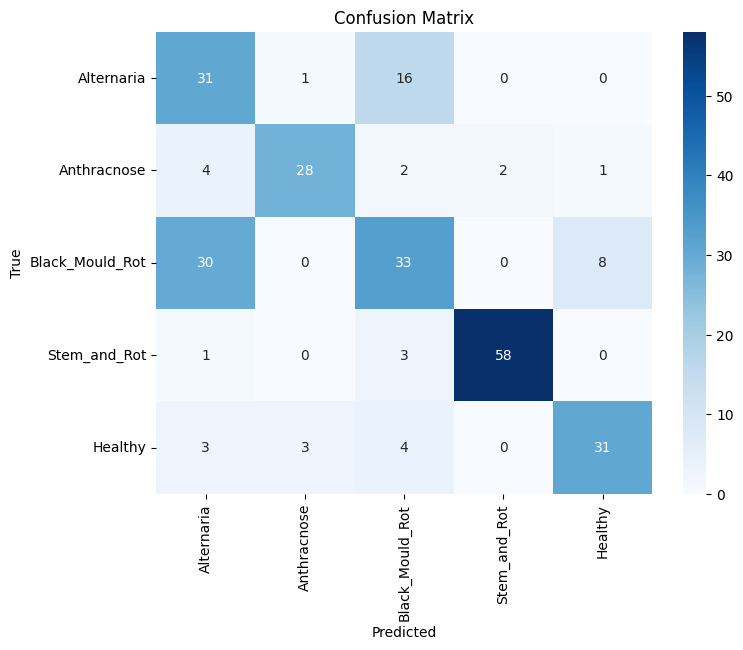

In [11]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_criteria(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_loss = train_loss / len(train_loader)
    print('Epoch {}: Train set: Average loss: {:.6f}'.format(epoch, avg_loss))
    return avg_loss

model_path = "/content/drive/MyDrive/MangoFruitDDS/model/model.pth"
# Training loop
epochs = 50
epoch_nums = []
training_loss = []
validation_loss = []

for epoch in range(1, epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, epoch)
    test_loss = test(model, device, test_loader)
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

    # Save the model after each epoch
    torch.save(model.state_dict(), model_path)

# Load the trained model for prediction
model.load_state_dict(torch.load(model_path))
model.eval()

# Generate predictions
truelabels = []
predictions = []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        truelabels.extend(target.cpu().numpy())
        predictions.extend(output.argmax(dim=1).cpu().numpy())

# Plot confusion matrix
cm = confusion_matrix(truelabels, predictions, labels=range(len(classes)))
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [13]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load the trained model
model_path = '/content/drive/MyDrive/MangoFruitDDS/model/model.pth'
model = Net(num_classes=len(classes))
model.load_state_dict(torch.load(model_path))
model.eval()

# Define the transform to preprocess the image
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Function to classify an image
def classify_image(image_path):
    # Load and preprocess the image
    image = Image.open(image_path)
    image_tensor = transform(image).unsqueeze(0)

    # Use the model to predict the class
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)

    # Map the predicted class index to the class name
    predicted_class = classes[predicted.item()]

    return predicted_class

# Example usage
image_path = '/content/drive/MyDrive/MangoFruitDDS/SenMangoFruitDDS_original/Alternaria/alternaria_012.jpg'
predicted_class = classify_image(image_path)
print(f"The image is classified as: {predicted_class}")


The image is classified as: Black_Mould_Rot


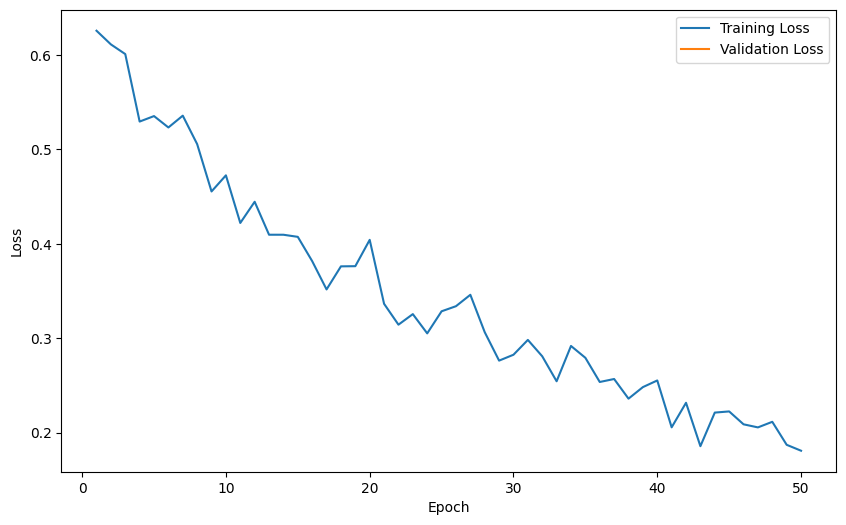

In [ ]:
# Plot loss history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(epoch_nums, training_loss, label='Training Loss')
plt.plot(epoch_nums, validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

This code uses matplotlib to plot the training and validation loss values collected during training. The x-axis represents the epoch number, and the y-axis represents the loss value. Here's a breakdown of the code:

1. **Import Matplotlib**: Imports the pyplot module from the matplotlib library as plt.

2. **Create Figure**: Creates a new figure with a specified size (10x6 inches) using plt.figure(figsize=(10, 6)).

3. **Plot Training and Validation Loss**: Uses plt.plot to plot the training loss (`training_loss`) and validation loss (`validation_loss`) against the epoch numbers (`epoch_nums`). The label parameter is used to label each line in the plot.

4. **Set Labels and Legend**: Sets the x-axis label to 'Epoch', the y-axis label to 'Loss', and adds a legend to differentiate between the training and validation loss lines.

5. **Display Plot**: Uses plt.show() to display the plot.

Overall, this code snippet visualizes the training and validation loss history of the CNN model during training, helping to understand how the model's performance changes over epochs.

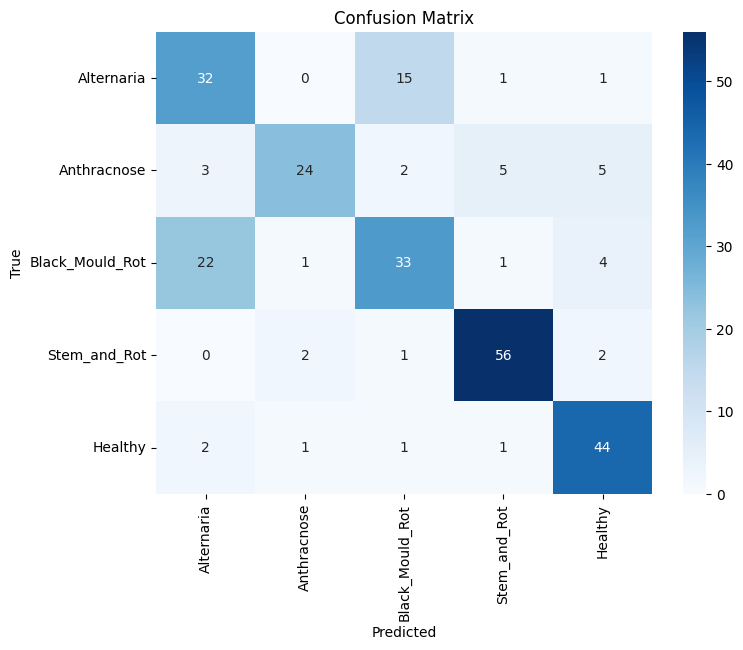

In [ ]:
# Confusion matrix
truelabels = []
predictions = []
model.eval()
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        truelabels.extend(target.cpu().numpy())
        predictions.extend(output.argmax(dim=1).cpu().numpy())

# Plot confusion matrix
cm = confusion_matrix(truelabels, predictions, labels=range(len(classes)))
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

This code snippet calculates and plots the confusion matrix for the CNN model's predictions on the test dataset. Here's a breakdown of the code:

1. **Prediction Loop**:
   - Sets the model to evaluation mode (`model.eval()`).
   - Iterates over batches of the test dataset (`test_loader`).
   - Moves the data and target tensors to the specified device (`data, target = data.to(device), target.to(device)`).
   - Computes the output of the model for the input data (`output = model(data)`).
   - Extracts the true labels (`target`) and predicted labels (`output.argmax(dim=1)`) from the tensors and converts them to numpy arrays (`target.cpu().numpy()` and `output.argmax(dim=1).cpu().numpy()`).
   - Extends the `truelabels` and `predictions` lists with the true and predicted labels, respectively.

2. **Confusion Matrix**:
   - Computes the confusion matrix using `confusion_matrix` from scikit-learn, with the true labels (`truelabels`) and predicted labels (`predictions`).
   - Creates a DataFrame (`df_cm`) from the confusion matrix, using the class names (`classes`) as index and column names.
   - Plots the confusion matrix using seaborn's heatmap, with annotations (`annot=True`) and a color map (`cmap='Blues'`).
   - Sets the x-axis label to 'Predicted', y-axis label to 'True', and title to 'Confusion Matrix'.

Overall, this code snippet provides a visual representation of how well the CNN model is performing in classifying mango fruit diseases by showing the confusion between predicted and true labels.

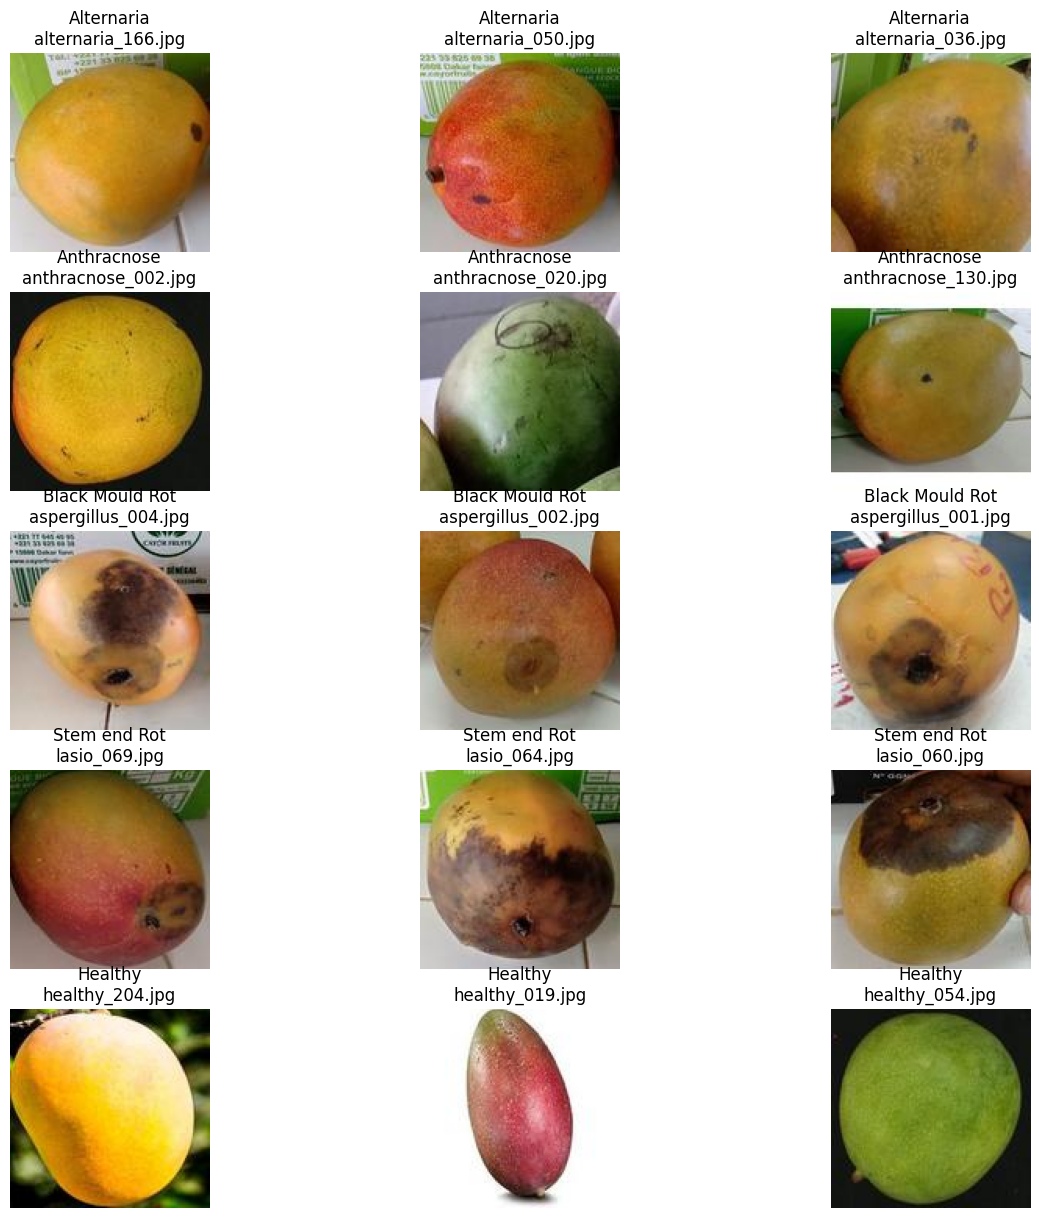

In [ ]:
#Sample Images

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the main folder containing the subdirectories
main_folder = '/content/drive/MyDrive/MangoFruitDDS/Mango'

# Specify the subdirectories
subdirectories = ['Alternaria', 'Anthracnose', 'Black Mould Rot', 'Stem end Rot', 'Healthy']

# Display three sample images from each subdirectory
plt.figure(figsize=(15, 15))

for i, subdir in enumerate(subdirectories):
    subdir_path = os.path.join(main_folder, subdir)
    image_files = [f for f in os.listdir(subdir_path) if f.endswith(('.jpg', '.jpeg', '.png'))][:3]

    for j, image_file in enumerate(image_files):
        img_path = os.path.join(subdir_path, image_file)
        img = mpimg.imread(img_path)

        # Calculate the position in the subplot grid
        position = i * 3 + j + 1

        plt.subplot(5, 3, position)
        plt.imshow(img)
        plt.title(f"{subdir}\n{image_file}")
        plt.axis('off')

plt.show()



This code snippet displays three sample images from each of the specified subdirectories in the main folder. Here's a breakdown of the code:

1. **Specify the Main Folder and Subdirectories**:
   - `main_folder` specifies the main folder containing the subdirectories.
   - `subdirectories` is a list containing the names of the subdirectories.

2. **Display Sample Images**:
   - The code iterates over each subdirectory.
   - For each subdirectory, it gets the path to the subdirectory (`subdir_path`) and lists the image files in that subdirectory (`image_files`).
   - It then iterates over the first three image files in the subdirectory and displays each image using `plt.imshow`.
   - The title of each image includes the subdirectory name and the image file name.
   - The `plt.subplot` function is used to arrange the images in a grid, with 5 rows and 3 columns for the five subdirectories and three sample images per subdirectory, respectively.

3. **Display the Plot**:
   - `plt.show()` is used to display the plot containing the sample images.

Overall, this code snippet provides a visual preview of the images in each subdirectory, helping to understand the dataset's contents and verify that the images were correctly resized and preprocessed for training.